In [1]:
import fractions
import math

fractions.gcd = math.gcd

import GG as gg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# def gauss_gcd_step(a, b):
#   x, y = gg.real(b/a), gg.imag(b/a)

#   qx, qy = math.floor(x + 0.5), math.floor(y + 0.5)

#   q = gg.GG(qx, qy)

#   r = b - q * a

#   return q, r

In [3]:
def field_div(x,y):
    if gg.norm(x) == 0:
      raise Exception("Division by zero")
    int_num = x * gg.conj(y)
    a, b = gg.real(int_num), gg.imag(int_num)
    int_den = gg.norm(x) # denominator of the complex quotient a / b
    a, b = a / int_den, b / int_den # components of the complex quotient a / b

    return (a, b)

In [4]:
def gauss_gcd(a, b):
  q, r = divmod(a, b)
  q1 = r
  steps = 1
  while gg.norm(r) > 0:
    a, b = b, r
    q, r = divmod(a, b)
    steps += 1
    if steps == 3:
      q1 = r
  return b, steps, q1

In [5]:
a = gg.GG(92, 87)
# 92 87

grid_size = 250

dividends = [gg.GG(x, y) for x in range(-grid_size, grid_size) for y in range(-grid_size, grid_size)]


In [6]:
steps = []
quots = []
circs_re = []
circs_im = []
for b in dividends:
  if gg.norm(b) == 0:
    steps.append(1)
    quots.append(0)
    continue
  g, s, q = gauss_gcd(a, b)
  steps.append(s)
  quots.append(gg.norm(q))


In [7]:
# assocs = [a, -a, a * gg.GG(0,1), a * gg.GG(0,-1)]
assocs = [a]

In [8]:
# # d2 = [gg.GG(x, y) for x in range(-5, 5) for y in range(-5, 5)]
# d2 = [gg.GG(1, 0)]

# for b in d2:
#     if gg.norm(b) != 0:
#         for i in [3, 5]:
#           assocs.append(a / gg.GG(i, 0))
#           assocs.append(a / gg.GG(0, i))
#           assocs.append(a / gg.GG(-i, 0))
#           assocs.append(a / gg.GG(0, -i))


In [9]:
def max_eqn(x):
    q, r = divmod(a, x)
    return 0.5 * gg.norm(x) - gg.norm(a - q * x)

In [10]:
g, s, r = gauss_gcd(a, (a - a * gg.GG(0,1)) / 2)
print(f"steps: {s}, remainder: {r}")

steps: 2, remainder: 1j


In [11]:
def circ_lines(m1, m2, c1, c2):
    p = complex(gg.real(a), gg.imag(a))
    c = complex(c1, c2)
    m = complex(m1, m2)

    t = np.linspace(-100, 100, 10000)

    w = p / (m * t + c)

    re_x = w.real
    re_y = w.imag

    plt.plot(re_x, re_y, color='purple')

In [12]:
def circ_lines2(m1, m2, c1, c2, q=complex(1,1)):
    p = complex(gg.real(a), gg.imag(a))
    c = complex(c1, c2)
    m = complex(m1, m2)

    t = np.linspace(-100, 100, 10000)

    line = m*t + c

    w = p * line / (q * line + 1)

    re_x = w.real
    re_y = w.imag

    plt.plot(re_x, re_y, color='purple')

In [13]:
def circ_lines3(m1, m2, c1, c2, q1=complex(1,0), q2=complex(1,0)):
    p = complex(gg.real(a), gg.imag(a))
    c = complex(c1, c2)
    m = complex(m1, m2)

    t = np.linspace(-100, 100, 10000)

    line = m*t + c

    w1 = 1 / (line + q2)
    w = p /  (1 + q1 * w1)

    re_x = w.real
    re_y = w.imag

    plt.plot(re_x, re_y, color='purple')

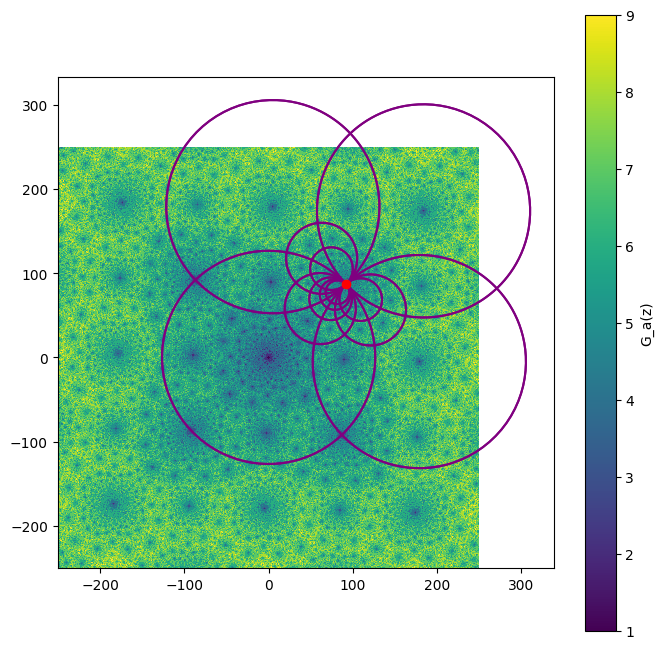

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

x, y = range(-grid_size, grid_size), range(-grid_size, grid_size)
X, Y = np.meshgrid(x, y, indexing='ij')

Z = np.array(steps).reshape(len(x), len(y))

cf = ax.pcolormesh(X, Y, Z, cmap='viridis', shading='nearest')

for assoc in assocs:
    ax.scatter(gg.real(assoc), gg.imag(assoc), color='red', zorder=5)
    # pts = circ(fine, assoc, np.sqrt(gg.norm(assoc)))
    # plt.plot(pts[:,0], pts[:,1], color='orange')

# for k in range(-3, 3):
#     for i in [1, -1]:
#         q1 = complex(i, 0)
#         q2 = complex(0, i)
#         circ_lines2(0, 1, k+0.5, 0, q1)
#         circ_lines2(0, 1, k+0.5, 0, q2)
#         circ_lines2(1, 0, 0, k+0.5, q1)
#         circ_lines2(1, 0, 0, k+0.5, q2)

# for k in range(-3, 3):
#     for i in [1]:
#         q1 = complex(i, 0)
#         q2 = complex(i, 0)
#         circ_lines3(0, 1, k+0.5, 0, q1, q2)
#         circ_lines3(0, 1, k+0.5, 0, q1, q2)
#         circ_lines3(1, 0, 0, k+0.5, q1, q2)
#         circ_lines3(1, 0, 0, k+0.5, q1, q2)


ax.set_aspect('equal')
cbar = plt.colorbar(cf)
cbar.set_label("G_a(z)")

plt.show()

In [15]:
def circ(t, c, r):
    return np.stack([gg.real(c) + r * np.cos(t), gg.imag(c) + r * np.sin(t)], axis=1)

In [16]:
# def circ_lines(k=0):
#     K = k + 0.5
#     c, d = gg.real(a), gg.imag(a)
#     # re_x1 = (K1*c+d*t)/(K1**2+t**2)
#     # re_y1 = (K1*d-c*t)/(K1**2+t**2)
#     # re_x2 = (K2*c+d*t)/(K2**2+t**2)
#     # re_y2 = (K2*d-c*t)/(K2**2+t**2)

#     t = np.linspace(0, 2*np.pi, 1000)

#     re_x = (c*(1+np.cos(t))-d*np.sin(t)) / (2*K)
#     re_y = (c*np.sin(t)+d*(1+np.cos(t))) / (2*K)

#     plt.plot(re_x, re_y, color='purple')

#     im_x = (c*(np.cos(t))-d*(-1+np.sin(t))) / (2*K)
#     im_y = (c*(-1+np.sin(t))+d*(np.cos(t))) / (2*K)
    
#     plt.plot(im_x, im_y, color='orange')
    
#     # im_x = (t*c+d*K)/(K**2+t**2)
#     # im_y = (t*d-c*K)/(K**2+t**2)

#     # x = np.concat([re_x, im_x], axis=0)
#     # y = np.concat([re_y, im_y], axis=0)

#     # x = im_x
#     # y = im_y

#     # return np.stack([x, y],axis=1)

In [17]:
# fine = np.linspace(0, 2*np.pi, 1000)

In [18]:
# pts = circ_lines(fine, k=1, comp="re")

In [19]:
# def circ_lines(m1, m2, c1, c2):
#     c, d = gg.real(a), gg.imag(a)

#     x0 = m2 / (2 * (c1*m2 + c2*m1))
#     y0 = m1 / (2 * (c1*m2 + c2*m1))
#     r = math.sqrt(x0**2 + y0**2)

#     t = np.linspace(0, 2*np.pi, 1000)

#     re_x = c * (x0 + r*np.cos(t)) - d * (y0 + r*np.sin(t))
#     re_y = c * (y0 + r*np.sin(t)) + d * (x0 + r*np.cos(t))

#     plt.plot(re_x, re_y, color='purple')


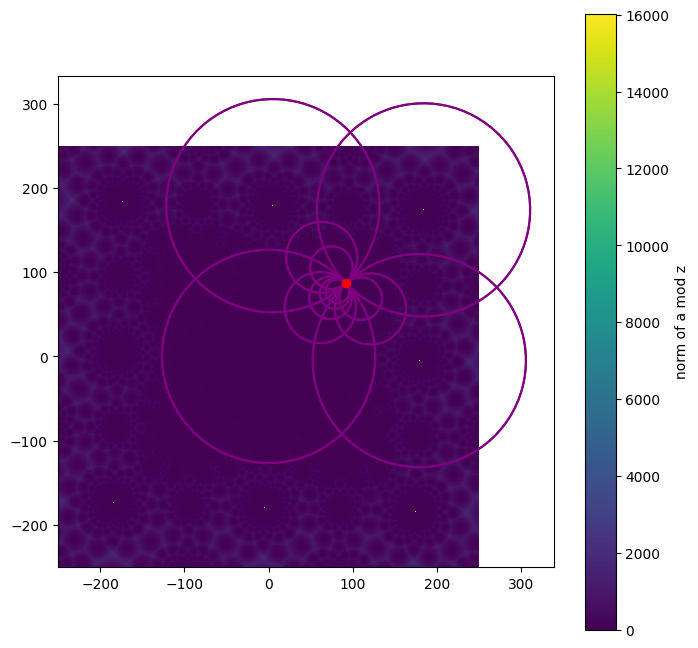

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))

x, y = range(-grid_size, grid_size), range(-grid_size, grid_size)
X, Y = np.meshgrid(x, y, indexing='ij')

Z = np.array(quots).reshape(len(x), len(y))

cf = ax.pcolormesh(X, Y, Z, cmap='viridis', shading='nearest')

for assoc in assocs:
    ax.scatter(gg.real(assoc), gg.imag(assoc), color='red', zorder=5)
    # pts = circ(fine, assoc, np.sqrt(gg.norm(assoc)))
    # plt.plot(pts[:,0], pts[:,1], color='orange')

# plt.plot(pts[:,0],pts[:,1],color='orange')

# for k in range(-3,3,1):
#     circ_lines(k)



# for k in range(-3, 3):
#     circ_lines(0, 1, k+0.5, 0)
#     circ_lines(1, 0, 0, k+0.5)

# for k in range(-4, 3):
#     for i in [1, -1]:
#         q1 = complex(i, 0)
#         q2 = complex(0, i)
#         circ_lines2(0, 1, k+0.5, 0, q1)
#         circ_lines2(0, 1, k+0.5, 0, q2)
#         circ_lines2(1, 0, 0, k+0.5, q1)
#         circ_lines2(1, 0, 0, k+0.5, q2)

for k in range(-3, 3):
    for i in [1]:
        q1 = complex(i, 0)
        q2 = complex(i, 0)
        circ_lines3(0, 1, k+0.5, 0, q1, q2)
        circ_lines3(0, 1, k+0.5, 0, q1, q2)
        circ_lines3(1, 0, 0, k+0.5, q1, q2)
        circ_lines3(1, 0, 0, k+0.5, q1, q2)

ax.set_aspect('equal')
cbar = plt.colorbar(cf)
cbar.set_label("norm of a mod z")

plt.show()